In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
data = pd.read_csv("minute_data/BTC-USD_1M_SIGNALS.csv")
data["Variation"] = np.log(data["Close"] / data["Close"].shift(1))

In [4]:
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14
0,1483229700,2017-01-01 00:15:00,BTC/USD,965.59,966.57,965.59,966.57,-0.253468,NaN,0.749648,-0.006265,-0.005177,-0.279809,-0.226580,-8.508324e-16
1,1483229760,2017-01-01 00:16:00,BTC/USD,966.22,966.22,965.56,965.56,-0.346989,-0.001045,-1.266964,-0.007681,-0.007818,-0.278297,-0.281190,-8.508324e-16
2,1483229820,2017-01-01 00:17:00,BTC/USD,965.56,965.56,965.56,965.56,-0.348679,0.000000,-1.266964,-0.008744,-0.009013,-0.279809,-0.281190,-8.508324e-16
3,1483229880,2017-01-01 00:18:00,BTC/USD,965.56,965.56,965.55,965.55,-0.347011,-0.000010,-1.281787,-0.009543,-0.009284,-0.279305,-0.281190,-8.508324e-16
4,1483229940,2017-01-01 00:19:00,BTC/USD,965.60,965.60,965.55,965.55,-0.348361,0.000000,-1.281787,-0.010101,-0.008876,-0.279809,-0.279049,-8.508324e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675282,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,-0.343970,-0.000916,-0.223879,0.326263,0.602670,1.194930,-0.281190,-6.406404e-01
2675283,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,-0.174816,-0.001163,-1.000228,0.122196,-0.047445,2.240397,-0.281190,-7.082843e-01
2675284,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,-0.346724,0.000386,-0.674068,0.003568,-0.345810,-0.279809,-0.281190,-8.411918e-01
2675285,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,-0.318366,0.000710,-0.124560,-0.010848,-0.314059,-0.279809,1.022493,-1.022375e+00


In [5]:
data["Variation STD"] = data["Variation"].rolling(30).std()
data = data[[i%10 == 0 for i in range(len(data))]]
data.reset_index(inplace=True, drop=True)
data = data.dropna()

In [6]:
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation STD
3,1483231500,2017-01-01 00:45:00,BTC/USD,966.38,966.40,965.94,965.94,-0.324797,-0.000455,-0.146921,0.001550,0.005198,-0.257640,-0.281190,0.023633,0.000486
4,1483232100,2017-01-01 00:55:00,BTC/USD,966.97,966.97,966.97,966.97,-0.348509,0.000000,1.753688,0.006221,0.004348,-0.279809,-0.281190,-0.628678,0.000268
5,1483232700,2017-01-01 01:05:00,BTC/USD,966.60,966.60,966.60,966.60,-0.348251,0.000000,0.207699,-0.000476,-0.006883,-0.279809,-0.281190,0.272268,0.000175
6,1483233300,2017-01-01 01:15:00,BTC/USD,962.54,962.54,962.54,962.54,-0.348679,0.000000,-4.202727,-0.032847,-0.045611,-0.279809,-0.281190,3.867775,0.000432
7,1483233900,2017-01-01 01:25:00,BTC/USD,963.95,963.95,963.95,963.95,-0.348679,0.000000,-0.663329,-0.021022,0.006825,-0.279809,-0.281190,0.555316,0.000771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267524,1646103360,2022-03-01 02:56:00,BTC/USD,43145.32,43187.13,43145.32,43169.63,-0.194780,0.000751,0.663980,0.018346,0.542540,-0.279809,2.390959,-1.116240,0.000661
267525,1646103960,2022-03-01 03:06:00,BTC/USD,43088.67,43089.68,43067.62,43088.98,-0.232515,0.000006,-0.953544,-0.242351,-0.668794,-0.279809,-0.281190,-1.326604,0.000440
267526,1646104560,2022-03-01 03:16:00,BTC/USD,42982.97,42982.97,42981.47,42981.47,-0.348438,-0.000128,-1.750674,-1.142327,-1.401177,-0.013782,-0.281190,0.690220,0.000620
267527,1646105160,2022-03-01 03:26:00,BTC/USD,43002.20,43002.20,42960.80,42960.80,-0.325925,-0.000966,-1.195833,-0.952279,0.339603,1.811125,-0.281190,1.461184,0.000646


In [7]:
data_19_20 = data.loc[(data["Unix"] >= 1546300800) & (
        data["Unix"] < 1609459200)]#.reset_index(drop=True)

data_2021 = data.loc[data["Unix"] >= 1609459200]#.reset_index(drop=True)

display(data_19_20)

gm = GaussianMixture(2, random_state=random.randint(1,1000), init_params="kmeans")
#labels = gm.fit_predict(data_19_20.drop(["Unix", "Open", "High", "Low", "Close", "Date", "Symbol"], axis=1))
#labels = gm.fit_predict(np.array(data_19_20["Variation STD"]).reshape(-1,1))
labels = gm.fit_predict(np.array(data["Variation STD"]).reshape(-1,1))#[data_19_20.index]

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation STD
105119,1546301220,2019-01-01 00:07:00,BTC/USD,3684.59,3685.52,3684.59,3684.77,-0.333743,-0.000627,-0.568549,0.005926,-0.013892,-0.154353,-0.281190,-0.369813,0.000741
105120,1546301820,2019-01-01 00:17:00,BTC/USD,3687.96,3687.96,3687.96,3687.96,-0.348679,0.000000,-0.339166,0.022283,-0.020790,-0.279809,-0.281190,-0.494274,0.000876
105121,1546302420,2019-01-01 00:27:00,BTC/USD,3688.35,3688.35,3688.35,3688.35,-0.348679,0.000000,-0.171752,-0.015758,-0.040523,-0.279809,-0.281190,-0.636182,0.000799
105122,1546303020,2019-01-01 00:37:00,BTC/USD,3696.87,3696.87,3696.87,3696.87,-0.348679,0.000000,1.226181,0.060030,0.094531,-0.279809,-0.281190,-0.243854,0.000715
105123,1546303620,2019-01-01 00:47:00,BTC/USD,3696.35,3696.35,3696.35,3696.35,-0.348679,0.000000,0.716425,0.051668,-0.013807,-0.279809,-0.281190,-0.541656,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206446,1609456500,2020-12-31 23:15:00,BTC/USD,29134.43,29143.60,29109.75,29125.00,1.859660,-0.000324,0.195748,-0.076341,0.693356,-0.279809,0.033621,0.296691,0.000836
206447,1609457100,2020-12-31 23:25:00,BTC/USD,29071.43,29090.15,29049.87,29049.87,1.707871,-0.000742,-1.103177,-0.374352,-0.721894,0.437659,-0.281190,-0.097455,0.000901
206448,1609457700,2020-12-31 23:35:00,BTC/USD,29021.32,29038.45,29021.32,29025.14,-0.174121,-0.000452,-0.761954,-0.735089,-0.206768,-0.279809,-0.281190,0.924215,0.000863
206449,1609458300,2020-12-31 23:45:00,BTC/USD,28887.99,28898.45,28843.74,28898.45,2.616730,-0.000212,-1.891504,-1.058544,-1.120155,1.463980,-0.281190,1.105225,0.001079


In [8]:
pd.Series(labels).value_counts()

0    265775
1      1751
dtype: int64

<AxesSubplot:>

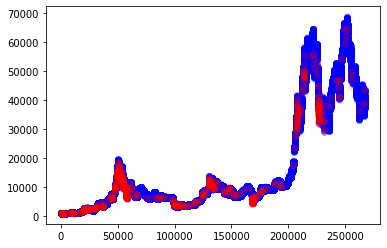

In [9]:
data["Label"] = labels
data["Close"][labels==0].plot(style='bo', alpha=0.1)
data["Close"][labels==1].plot(style='ro', alpha=0.1)

In [10]:
data_19_20

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation STD
105119,1546301220,2019-01-01 00:07:00,BTC/USD,3684.59,3685.52,3684.59,3684.77,-0.333743,-0.000627,-0.568549,0.005926,-0.013892,-0.154353,-0.281190,-0.369813,0.000741
105120,1546301820,2019-01-01 00:17:00,BTC/USD,3687.96,3687.96,3687.96,3687.96,-0.348679,0.000000,-0.339166,0.022283,-0.020790,-0.279809,-0.281190,-0.494274,0.000876
105121,1546302420,2019-01-01 00:27:00,BTC/USD,3688.35,3688.35,3688.35,3688.35,-0.348679,0.000000,-0.171752,-0.015758,-0.040523,-0.279809,-0.281190,-0.636182,0.000799
105122,1546303020,2019-01-01 00:37:00,BTC/USD,3696.87,3696.87,3696.87,3696.87,-0.348679,0.000000,1.226181,0.060030,0.094531,-0.279809,-0.281190,-0.243854,0.000715
105123,1546303620,2019-01-01 00:47:00,BTC/USD,3696.35,3696.35,3696.35,3696.35,-0.348679,0.000000,0.716425,0.051668,-0.013807,-0.279809,-0.281190,-0.541656,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206446,1609456500,2020-12-31 23:15:00,BTC/USD,29134.43,29143.60,29109.75,29125.00,1.859660,-0.000324,0.195748,-0.076341,0.693356,-0.279809,0.033621,0.296691,0.000836
206447,1609457100,2020-12-31 23:25:00,BTC/USD,29071.43,29090.15,29049.87,29049.87,1.707871,-0.000742,-1.103177,-0.374352,-0.721894,0.437659,-0.281190,-0.097455,0.000901
206448,1609457700,2020-12-31 23:35:00,BTC/USD,29021.32,29038.45,29021.32,29025.14,-0.174121,-0.000452,-0.761954,-0.735089,-0.206768,-0.279809,-0.281190,0.924215,0.000863
206449,1609458300,2020-12-31 23:45:00,BTC/USD,28887.99,28898.45,28843.74,28898.45,2.616730,-0.000212,-1.891504,-1.058544,-1.120155,1.463980,-0.281190,1.105225,0.001079


<ipython-input-11-e26c8c25d129>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20["Label"] = labels


<AxesSubplot:>

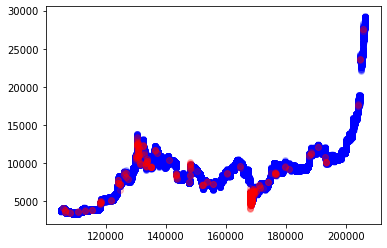

In [11]:
labels = data["Label"][data_19_20.index]
data_19_20["Label"] = labels
data_19_20["Close"][labels==0].plot(style='bo', alpha=0.2)
data_19_20["Close"][labels==1].plot(style='ro', alpha=0.2)

In [12]:
pd.Series(labels).value_counts()

0    100864
1       468
Name: Label, dtype: int64

<AxesSubplot:>

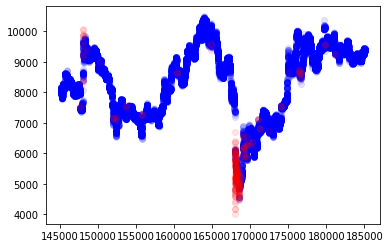

In [13]:
data_split = data_19_20[40000:80000]
data_split["Close"][data_split["Label"]==0].plot(style='bo', alpha=0.1)
data_split["Close"][data_split["Label"]==1].plot(style='ro', alpha=0.1)

In [14]:
data_2021 = data.loc[data["Unix"] >= 1609459200]

<ipython-input-15-1e5640eda884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Label"] = labels


<AxesSubplot:>

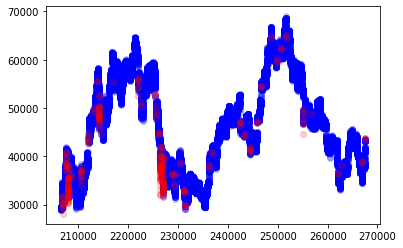

In [15]:
labels = data["Label"][data_2021.index]
data_2021["Label"] = labels
data_2021["Close"][labels==0].plot(style='bo', alpha=0.2)
data_2021["Close"][labels==1].plot(style='ro', alpha=0.2)

In [16]:
print(gm.means_)
print()
print(gm.covariances_)
print()
print(gm.weights_)

[[0.00104874]
 [0.00229634]]

[[[1.43168445e-06]]

 [[6.88194274e-06]]]

[0.96297136 0.03702864]


In [17]:
import pandas_ta as ta
import data_processing

In [18]:
data.drop(['RSI', 'ADX14'], axis=1, inplace=True)
data = data_processing.add_rsi(data)
data = data_processing.add_adx(data)

In [19]:
data.ta.rsi(cumulative=True, append=True)

3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
            ...    
267524    55.769755
267525    52.357901
267526    48.130787
267527    47.339451
267528    52.606950
Name: RSI_14, Length: 267526, dtype: float64

In [21]:
#data[['RSI', 'RSI_14']]

In [22]:
data.ta.adx(cumulative=True, append=True)

,ADX_14,DMP_14,DMN_14
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
...,...,...,...
267524,35.695347,46.091035,33.806703
267525,33.810037,43.552272,36.140082
267526,31.597643,40.989727,38.728499
267527,29.432714,40.013385,38.995251


In [23]:
data[['ADX14', 'ADX_14']]

KeyError: "['ADX14'] not in index"

In [ ]:
ta.macd(data["Close"])

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
...,...,...,...
267524,166.674160,-97.184602,263.858762
267525,144.404879,-95.563106,239.967985
267526,116.735501,-98.585987,215.321489
267527,92.078006,-98.594786,190.672792


In [ ]:
ta.log_return(data["Close"])

3              NaN
4         0.001066
5        -0.000383
6        -0.004209
7         0.001464
            ...   
267524    0.000508
267525   -0.001870
267526   -0.002498
267527   -0.000481
267528    0.003016
Name: LOGRET_1, Length: 267526, dtype: float64

In [ ]:
np.log(data["Close"] / data["Close"].shift(1))

3              NaN
4         0.001066
5        -0.000383
6        -0.004209
7         0.001464
            ...   
267524    0.000508
267525   -0.001870
267526   -0.002498
267527   -0.000481
267528    0.003016
Name: Close, Length: 267526, dtype: float64

In [24]:
ta.percent_return(data["Close"])

3              NaN
4         0.001066
5        -0.000383
6        -0.004200
7         0.001465
            ...   
267524    0.000508
267525   -0.001868
267526   -0.002495
267527   -0.000481
267528    0.003020
Name: PCTRET_1, Length: 267526, dtype: float64

In [26]:
data["Close"] / data["Close"].shift(1) - 1

3              NaN
4         0.001066
5        -0.000383
6        -0.004200
7         0.001465
            ...   
267524    0.000508
267525   -0.001868
267526   -0.002495
267527   -0.000481
267528    0.003020
Name: Close, Length: 267526, dtype: float64

In [35]:
interval = 14

rsi = ta.rsi(data["Close"], length=interval)
    
rsi = rsi.rename("RSI")

rsi


3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
            ...    
267524    55.769755
267525    52.357901
267526    48.130787
267527    47.339451
267528    52.606950
Name: RSI, Length: 267526, dtype: float64